
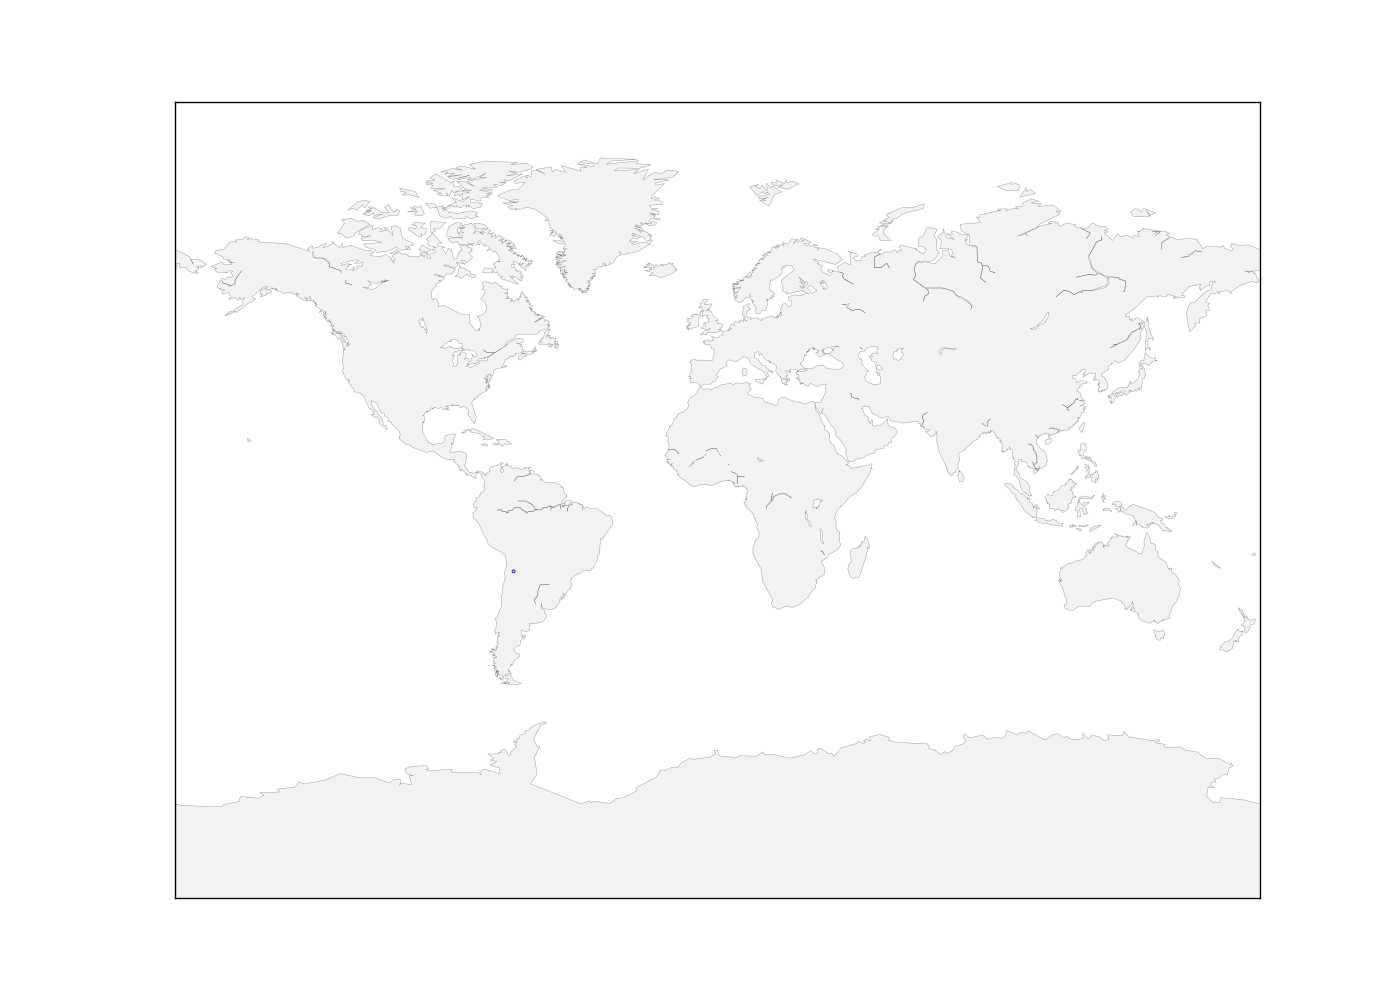

In [1]:
#Mitchell Childerhose (100553756) 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation
import urllib
from mpl_toolkits.basemap import Basemap
from numpy import *

import xlrd
import csv

#excel to csv
def excel_to_csv():
    wb = xlrd.open_workbook('Source_data_for_CFR_vaccine_map - Sheet1.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    csv_file = open('Source_data_for_CFR_vaccine_map_abridged.csv', 'w')
    wr = csv.writer(csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))
    csv_file.close()
    
excel_to_csv();    
    
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

url = urllib.request.urlopen(feed + "4.5_month.csv")

# Reading and storage of data
data = url.read().split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])

for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])
    
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)

earth = Basemap(projection='mill')

earth.drawcoastlines(color='0.50', linewidth=0.25)
earth.fillcontinents(color='0.95')

P = np.zeros(50, dtype=[('position', float, 2),
                         ('size',     float, 1),
                         ('growth',   float, 1),
                         ('color',    float, 4)])
scat = ax.scatter(P['position'][:,0], P['position'][:,1], P['size'], lw=0.5,
                  edgecolors = P['color'], facecolors='None', zorder=10)

def update(frame):
    current = frame % len(E)
    i = frame % len(P)

    P['color'][:,3] = np.maximum(0, P['color'][:,3] - 1.0/len(P))
    P['size'] += P['growth']

    magnitude = E['magnitude'][current]
    P['position'][i] = earth(*E['position'][current])
    P['size'][i] = 5
    P['growth'][i]= np.exp(magnitude) * 0.1

    if magnitude < 6:
        P['color'][i]    = 0,0,1,1
    else:
        P['color'][i]    = 1,0,0,1
    scat.set_edgecolors(P['color'])
    scat.set_facecolors(P['color']*(1,1,1,0.25))
    scat.set_sizes(P['size'])
    scat.set_offsets(P['position'])
    return scat,

anim = animation.FuncAnimation(fig, update, frames=200, interval=10, blit=True)
display_animation(anim)